<a href="https://colab.research.google.com/github/preetikhullbe/Online-retail-customer-segmentatiion/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online retail customer segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Understanding Customer Segmentation**
Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other. The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.

Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.



# **Why segment your customers?**
customer segmentation has a lot of potential benefits. It helps a company to develop an effective strategy for targeting its customers. This has a direct impact on the entire product development cycle, the budget management practices, and the plan for delivering targeted promotional content to customers. For example, a company can make a high-end product, a budget product, or a cheap alternative product, depending upon whether the product is intended for its most high yield customers, frequent purchasers or for the low-value customer segment. It may also fine-tune the features of the product for fulfilling the specific needs of its customers.

Customer segmentation can also help a company to understand how its customers are alike, what is important to them, and what is not. Often such information can be used to develop personalized relevant content for different customer bases. Many studies have found that customers appreciate such individual attention and are more likely to respond and buy the product. They also come to respect the brand and feel connected with it. This is likely to give the company a big advantage over its competitors. In a world where everyone has hundreds of emails, push notifications, messages, and ads dropping into their content stream, no one has time for irrelevant content.

Finally, this technique can also be used by companies to test the pricing of their different products, improve customer service, and upsell and cross-sell other products or services

# **GitHub Link -**

https://github.com/preetikhullbe/Online-retail-customer-segmentatiion

# **Problem Statement**



In this project, task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

# **How to segment your customers?**
To start with customer segmentation, a company needs to have a clear vision and a goal in mind. The following steps can be undertaken to find segments in the customer base on a broad level.

**Analyze the existing customer pool**: Understanding the geographical distribution, customer preferences/beliefs, reviewing website search page analytics, etc.

**Develop an understanding of each customer**: Mapping each customer to a set of preferences to understand and predict their behavior: the products, services, and content they would be interested in.

**Define segment opportunities**: Once the segments have been defined, there should a proper business understanding of each segment and its challenges and opportunities. The entire company’s marketing strategy can be branched out to cater to different niches of customers.

**Research the segment**: After cementing the definition and business relevance of different customer segments, a company needs to understand how to modify its products or services to better cater to them. For example, it may decide to provide higher discounts to some customers compared to others to expand its active customer base.

**Tweak strategy**: Experiment with new strategies and understand the impact of time and economy on the purchasing behavior of customers in different segments. And then the process should be repeated for refining the strategy as much as possible.

# ***Let's Begin !***

In the following analysis, I am going to use the Online Retail Data Set. The data contains information about transnational transactions for a UK-based and registered non-store online retail.

## ***1. Know Your Data***


### <b>Attribute Information: </b>

* ### **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### **Description**: Product (item) name. Nominal.
* ### **Quantity**: The quantities of each product (item) per transaction. Numeric.
* ### **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
* ### **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### **Country**: Country name. Nominal, the name of the country where each customer resides.

### Importing some important Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
from numpy import math

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
# read Excel file with Panda Dataframe
cust_seg_df=pd.read_excel("/content/drive/MyDrive/Online Retail.xlsx") 

### Dataset First View

In [4]:
# Dataset First Look
# first 10 rows and columns of data set
cust_seg_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# last 5 rows and columns of data set
cust_seg_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Shape of Data set in the form of rows and columns
cust_seg_df.shape

(541909, 8)

we have 541909 records for 8 columns.

### Dataset Information

In [7]:
# # Check Information of data set
cust_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Check Description of data set
cust_seg_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Let's check Description of data set with another way
cust_seg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# **Unique value**

In [10]:
# Let's Check Number of Unique values for each column
for col in ["InvoiceNo","StockCode","InvoiceDate","CustomerID", "Country"]:
    print("Unique Values for ", col, " - ", cust_seg_df[col].nunique())

Unique Values for  InvoiceNo  -  25900
Unique Values for  StockCode  -  4070
Unique Values for  InvoiceDate  -  23260
Unique Values for  CustomerID  -  4372
Unique Values for  Country  -  38


#### Duplicate Values

In [11]:
# Check duplicate values Present in data set
len(cust_seg_df[cust_seg_df.duplicated()])

5268

In [12]:
print("Shape before dropping duplicates", cust_seg_df.shape)
cust_seg_df = cust_seg_df.drop_duplicates()
print("Shape after dropping duplicates", cust_seg_df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (536641, 8)


## Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
cust_seg_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [14]:
# Missing Value Count Function
def show_missing():
    missing = cust_seg_df.columns[cust_seg_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('----'*25)
print('Missing Data Percentage')
print(round(cust_seg_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(cust_seg_df)*100,2))

Missing Data Count
CustomerID     135037
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     25.16
Description     0.27
dtype: float64


##From above we can see that Description 0.27% and Customer Id have 25.16% null values


Text(0.5, 1.0, ' Visulaizing Missing Values')

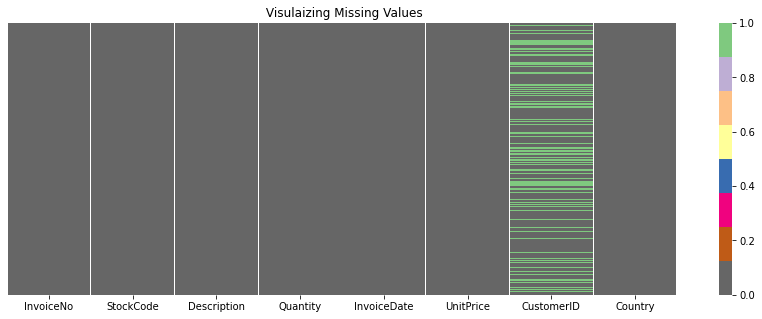

In [19]:
# Visualizing the missing valuesprint
plt.figure(figsize=(15,5))
sns.heatmap(cust_seg_df.isnull(),cmap='Accent_r',annot=False,yticklabels=False)
plt.title(" Visulaizing Missing Values")

## Check if InvoiceNo for Null Customer ID exist in cases where Customer ID is present for filling CustomerID Nulls

In [20]:
null_id_invoices = cust_seg_df[cust_seg_df.CustomerID.isnull()]["InvoiceNo"].drop_duplicates().tolist()
print("Invoices count with Null Customer ID", len(null_id_invoices))
### Check if InvoiceNo in Null CustomerID dataframe exist in Non-Null Customer ID Dataframe
cust_seg_df[~cust_seg_df.CustomerID.isnull()][cust_seg_df.InvoiceNo.isin(null_id_invoices)]

Invoices count with Null Customer ID 3710


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No such cases present as empty dataframe is returned

Since the customer ID's are missing, I assume these orders were not made by the customers already in the data set because those customers already have ID's. I also don't want to assign these orders to those customers because this would alter the insights I draw from the data. Instead of dropping the null CustomerID values which amounts to ~25% of data, let's assign those rows a unique customer ID per order using InvoiceNo. This will act as a new customer for each unique order.

Check if InvoiceNo has unique mapping with Customer ID so that each InvoiceNo corresponding to Null CustomerID can be assigned as New Customer

In [21]:
cust_seg_df.groupby(['InvoiceNo'])['CustomerID'] \
                             .nunique() \
                             .reset_index(name='nunique') \
                             .sort_values(['nunique'], ascending=False) \
                             .head(5)

,InvoiceNo,nunique
0,536365,1
16915,571200,1
16924,571215,1
16923,571214,1
16922,571213,1



On sorting descending, this data shows that each Invoice relates to maximum of 1 Customer

Creating NewID column and Assigning to InvoiceNo wherever CustomerID is null

In [22]:
cust_seg_df['NewID'] = cust_seg_df['CustomerID']
cust_seg_df.loc[cust_seg_df['CustomerID'].isnull(), ['NewID']] = cust_seg_df['InvoiceNo']

#Remove all non digits from column NewID (Since Invoice can contains "C" referring to cancellations)
cust_seg_df['NewID'] = cust_seg_df['NewID'].astype(str).str.replace('\D+', '')

#Convert to integer
cust_seg_df['NewID'] = pd.to_numeric(cust_seg_df['NewID'])

### Check if presnt customerIds and New Ids have any common values since it would create alter actual Customer Insights
customer = cust_seg_df['CustomerID'].nunique()
null_invoices = cust_seg_df[cust_seg_df.CustomerID.isnull()]['InvoiceNo'].nunique()
new_ids = cust_seg_df['NewID'].nunique()
print("Number of Customers:", customer)
print("Number of Orders where CustomerID in Null:", null_invoices)
print("Number of Customers + Number of Orders where CustomerID in Null:", customer + null_invoices)
print("Number of New ID's:", new_ids)

Number of Customers: 4372
Number of Orders where CustomerID in Null: 3710
Number of Customers + Number of Orders where CustomerID in Null: 8082
Number of New ID's: 8082


## Since both values equal, we know all the different orders that didn't have a customer ID got assigned unique NewID and no duplicates were created

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***